# Hybrid algorithm. Parameter investigation. Evaluation

Base settings: <br/>
1. #of items total = 1000
2. baseround_items = 20
3. LR = 10
4. machine_selection_confidence = 0.95
5. mahine_machine_tests = 50
5. items_num = 5
6. J = 3
7. Proportion "IN" items = 0.3
8. #of filters = 4
9. thrsh for "OUT" = 0.99
10. corr values in [0., 0.2, 0.3, 0.5, 0.7, 0.9]
11. machine acuracies is in 0.5-0.95
12. crowd cost = 1 per filter
12. expert cost = 20 per paper
13. results are averaged by 50 repetitions


In [19]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [20]:
# ![alt text](imagename.png "Title")

In [36]:
def plot_chart(data, title, y_limit=None):
    fig, ax = plt.subplots(figsize=(15,13))
    colors = ['red', 'red', 'blue', 'blue', 'green', 'green']
    algos = ['Machines-Ensemble', 'Hybrid-Ensemble', 'Crowd-Ensemble']
    ax.set_color_cycle(colors)

    markers = ['*', 'o', '^']
    def plot_alg(data, alg, marker):
        y = data.loc[(data['algorithm'] == alg)]['loss_mean'].values
        x = data.loc[(data['algorithm'] == alg)]['price_mean'].values
        err_y = data.loc[(data['algorithm'] == alg)]['loss_std'].values
        plt.plot(x, y, label=alg, marker=marker)
        plt.errorbar(x, y, yerr=err_y, marker=marker, elinewidth=1, capsize=2)

    for alg, marker in zip(algos, markers):
        plot_alg(data, alg, marker)
    plt.title(title, size=30)
    plt.xlabel('Price Ratio', size=30)
    plt.ylabel('Loss', size=30)
    plt.legend(fontsize = 30)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.grid()
    if y_limit:
        plt.ylim(y_limit)

# 1. Chart: Base settings

/Users/evgenykrivosheev/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


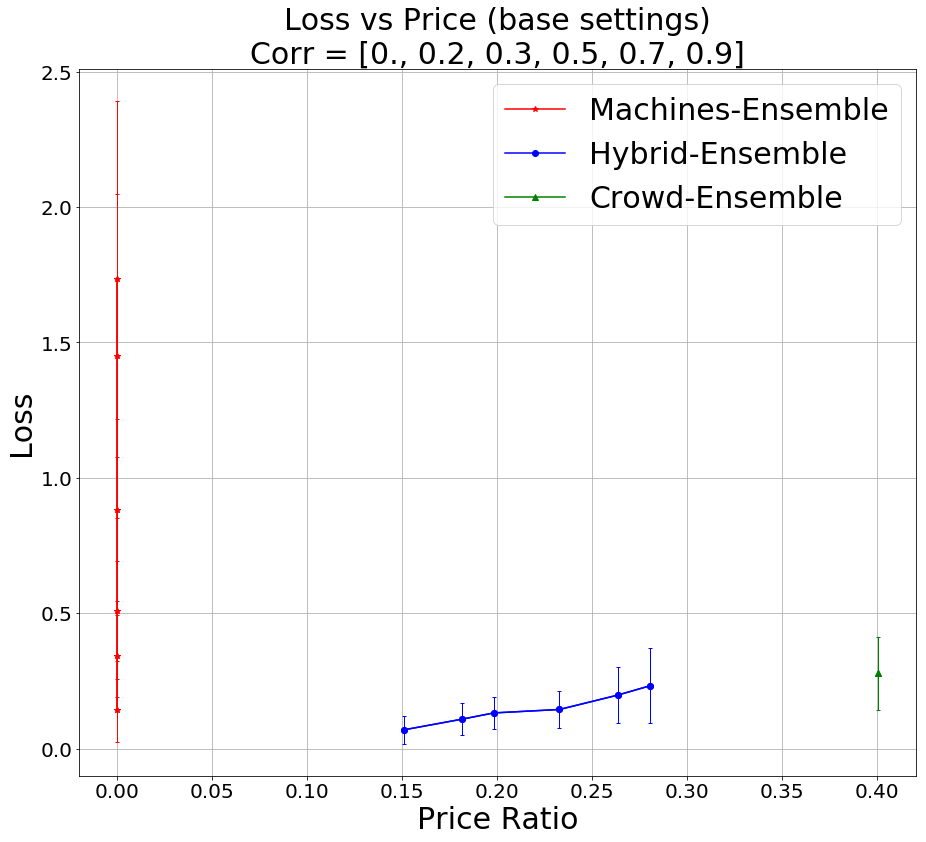

In [37]:
data = pd.read_csv('../output/data/fig0_base_settings.csv')
data['price_mean'] /= 20
data['price_std'] /= 20
title = 'Loss vs Price (base settings)\nCorr = [0., 0.2, 0.3, 0.5, 0.7, 0.9]'

plot_chart(data, title)

# 2. Chart: (Vary #of tests for machines)

#of tests for machines = [ 15,  20,  30,  40,  50, 100, 150, 200, 500]

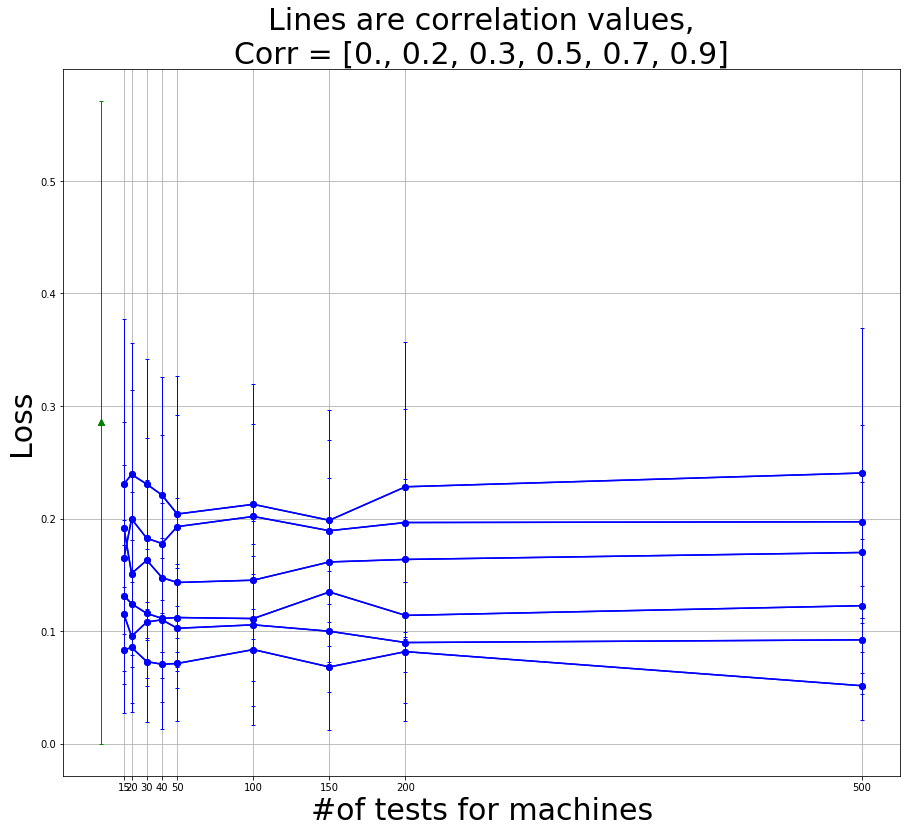

In [46]:
data = pd.read_csv('../output/data/fig3_tests_num.csv')
fig, ax = plt.subplots(figsize=(15,13))

y_srun = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0)]['loss_mean'].values
err_srun = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0)]['loss_mean'].values
plt.plot(0, y_srun, label='Crowd-Ensemble', marker='^', color='green')
plt.errorbar(0, y_srun, yerr=err_srun, marker='^', elinewidth=1, color='green', capsize=2)

x = [15.,   20.,   30.,   40.,   50.,  100.,  150.,  200.,  500.]
corr = data['corr'].unique()
for c in corr:
    y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == c)]['loss_mean'].values
#     x = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['machine_tests'] == t)]['price_mean'].values
    err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == c)]['loss_std'].values
    plt.plot(x, y, label='Hybrid-Ensemble', marker='o', color='b')
    plt.errorbar(x, y, yerr=err, marker='o', elinewidth=1, color='b', capsize=2)

plt.title('Lines are correlation values,\nCorr = [0., 0.2, 0.3, 0.5, 0.7, 0.9]', size=30)
plt.xlabel('#of tests for machines', size=30)
plt.ylabel('Loss', size=30)
# plt.legend(fontsize = 30)
plt.xticks(x)
plt.grid()

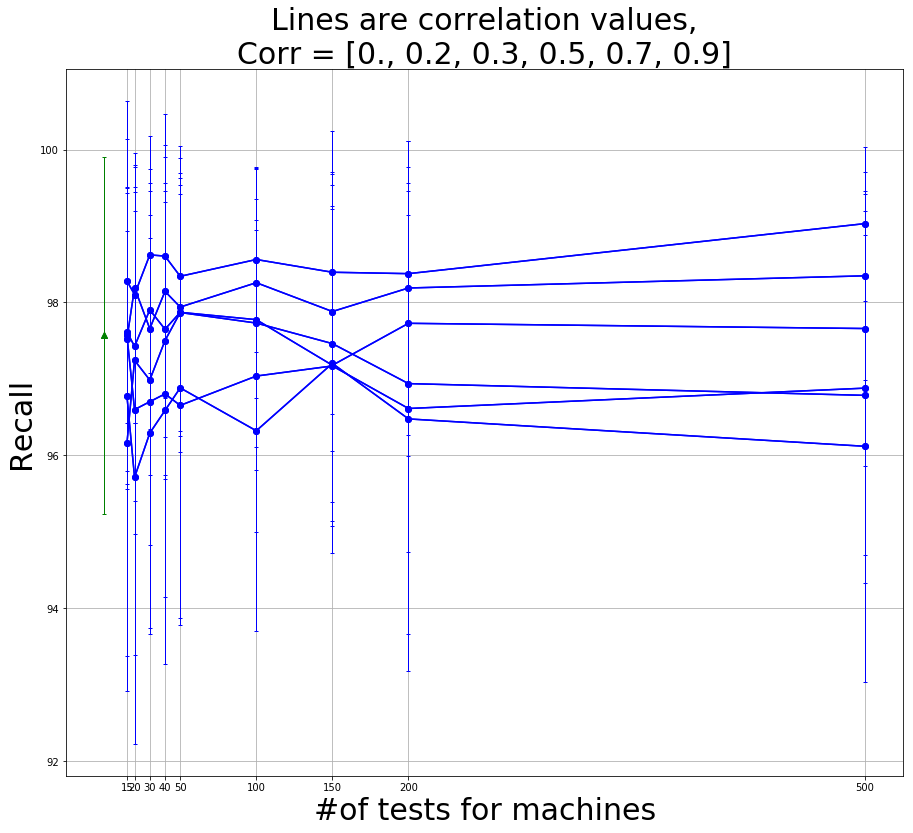

In [47]:
fig, ax = plt.subplots(figsize=(15,13))

y_srun = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0)]['recall'].values
err_srun = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0)]['recall_std'].values
plt.plot(0, y_srun, label='Crowd-Ensemble', marker='^', color='green')
plt.errorbar(0, y_srun, yerr=err_srun, marker='^', elinewidth=1, color='green', capsize=2)

x = [15.,   20.,   30.,   40.,   50.,  100.,  150.,  200.,  500.]
corr = data['corr'].unique()
for c in corr:
    y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == c)]['recall'].values
#     x = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['machine_tests'] == t)]['price_mean'].values
    err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == c)]['recall_std'].values
    plt.plot(x, y, label='Hybrid-Ensemble', marker='o', color='b')
    plt.errorbar(x, y, yerr=err, marker='o', elinewidth=1, color='b', capsize=2)

plt.title('Lines are correlation values,\nCorr = [0., 0.2, 0.3, 0.5, 0.7, 0.9]', size=30)
plt.xlabel('#of tests for machines', size=30)
plt.ylabel('Recall', size=30)
# plt.legend(fontsize = 30)
plt.xticks(x)
plt.grid()

# 3. Chart: vary machine-selection-confidence

machine_selec_conf in [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]

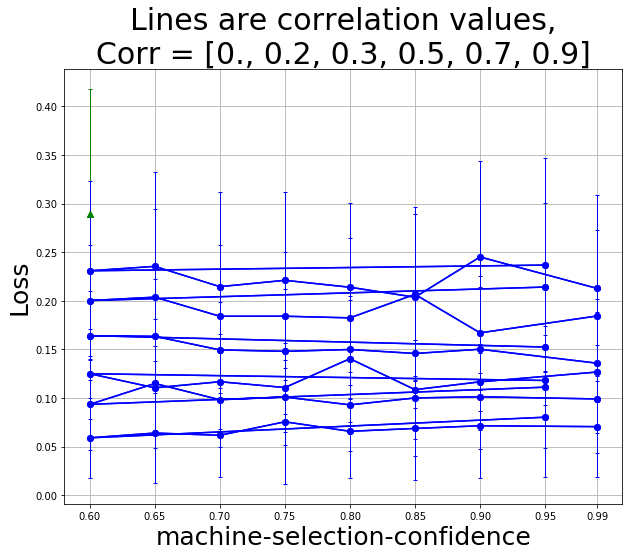

In [25]:
data = pd.read_csv('../output/data/fig2_select_conf.csv')

fig, ax = plt.subplots(figsize=(10,8))

y_srun = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0)]['loss_mean'].values[0]
err_srun = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0)]['loss_std'].values[0]
plt.plot(0.6, y_srun, label='Crowd-Ensemble', marker='^', color='green')
plt.errorbar(0.6, y_srun, yerr=err_srun, marker='^', elinewidth=1, color='green', capsize=2)

x = data['select_conf'].unique()
corr = data['corr'].unique()
for c in corr:
    y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == c)]['loss_mean'].values
#     x = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['machine_tests'] == t)]['price_mean'].values
    err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == c)]['loss_std'].values
    plt.plot(x, y, label='Hybrid-Ensemble', marker='o', color='b')
    plt.errorbar(x, y, yerr=err, marker='o', elinewidth=1, color='b', capsize=2)

plt.title('Lines are correlation values,\nCorr = [0., 0.2, 0.3, 0.5, 0.7, 0.9]', size=30)
plt.xlabel('machine-selection-confidence', size=25)
plt.ylabel('Loss', size=25)
# plt.legend(fontsize = 25)
plt.xticks(x)
plt.grid()

# 4. Chart: vary expert cost

expert_vote_cost in [10,  20, 30, 40, 50, 70, 100]

/Users/evgenykrivosheev/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


10
10
20
20
30
30
40
40
50
50
70
70
100
100


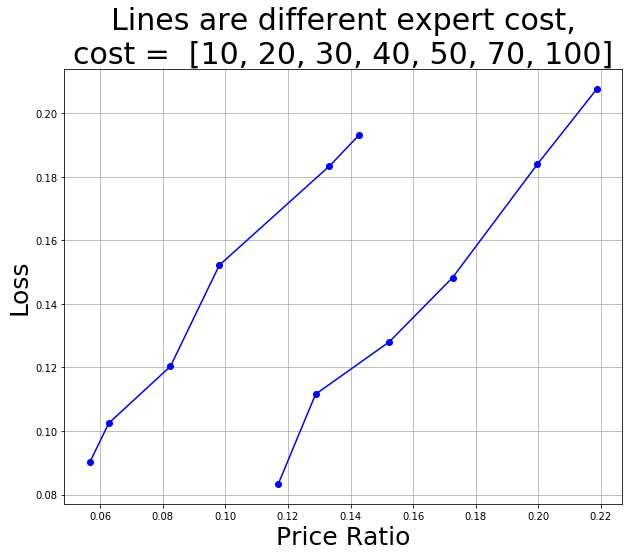

In [40]:
data = pd.read_csv('../output/data/fig1_expert_cost.csv')

fig, ax = plt.subplots(figsize=(10,8))
# colors = ['green', 'green', 'red', 'red']
colors = ['green', 'red']
algos = ['Crowd-Ensemble', 'Hybrid-Ensemble']
ax.set_color_cycle(colors)

markers = ['^', 'o']
def plot_alg(data, alg, marker, c):
    print(c)
    y = data.loc[(data['algorithm'] == alg) & (data['machine_tests'] == 50) & (data['expert_cost'] == c)]['loss_mean'].values
    x = data.loc[(data['algorithm'] == alg) & (data['machine_tests'] == 50) & (data['expert_cost'] == c)]['price_mean'].values
    x /= c
    err = data.loc[(data['algorithm'] == alg) & (data['machine_tests'] == 50) & (data['expert_cost'] == c)]['loss_std'].values
    plt.plot(x, y, label=alg, marker=marker, color = 'b')
#     plt.errorbar(x, y, yerr=err, marker=marker, elinewidth=1, capsize=2)

expert_cost = data['expert_cost'].unique()
# expert_vote_cost = [10, 30]
for c in expert_cost:
    for alg, marker in zip(algos, markers):
        plot_alg(data, alg, marker, c)

plt.title('Lines are different expert cost,\ncost =  [10, 20, 30, 40, 50, 70, 100]', size=30)
plt.xlabel('Price Ratio', size=25)
plt.ylabel('Loss', size=25)
# plt.ylim((0., 0.5))
# plt.legend(fontsize = 25)
plt.grid()

In [45]:
data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['machine_tests'] == 50) & (data['expert_cost'] == 10)]['loss_mean'].values

array([], dtype=float64)

# 5. Chart : Price Ratio vs Expert cost

ValueError: x and y must have same first dimension, but have shapes (7,) and (2,)

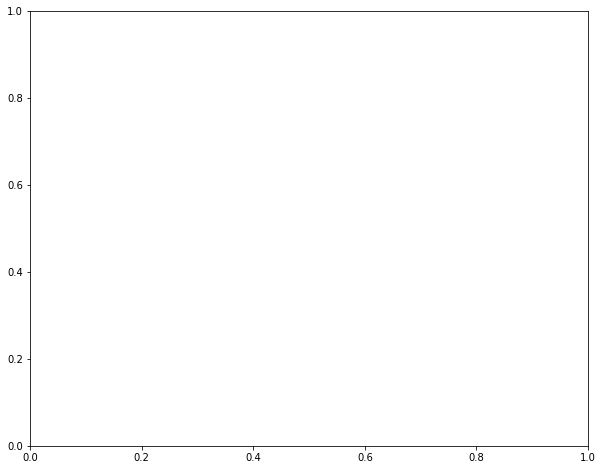

In [27]:
from operator import truediv
data = pd.read_csv('../output/data/fig1_expert_cost.csv')

fig, ax = plt.subplots(figsize=(10,8))

expert_cost = data['expert_cost'].unique()
x = expert_cost

corr_list = data['corr'].unique()
# for corr in corr_list:
for corr, s in zip([0., 0.3, 0.9], ['-', '--', ':']):
    y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['machine_tests'] == 50) 
                 & (data['corr'] == corr)]['price_mean'].values
    y = list(map(truediv, y, x))
    err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['machine_tests'] == 50) 
                 & (data['corr'] == corr)]['price_std'].values
    plt.plot(x, y, label='Hybrid-Ensemble, corr = {}'.format(corr), marker='o', color='b', linestyle=s)
    err = list(map(truediv, err, x))
    plt.errorbar(x, y, yerr=err, elinewidth=1, color='b', linestyle=s, capsize=2)
 
for corr in [0.]:
    y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0) 
                 & (data['corr'] == corr)]['price_mean'].values
    y = list(map(truediv, y, x))
    err2 = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['machine_tests'] == 0) 
                 & (data['corr'] == corr)]['price_std'].values
    plt.plot(x, y, label='Crowd-Ensemble', marker='^', color='green')
    err2 = list(map(truediv, err2, x))
    plt.errorbar(x, y, yerr=err, elinewidth=1, color='green', capsize=2)



plt.title('Price Ratio vs Expert Cost', size=30)
plt.ylabel('Price Ratio', size=25)
plt.xlabel('Expert Cost', size=25)
# plt.ylim((0., 0.5))
plt.xticks(x)
plt.legend(fontsize = 20)
plt.grid()

# 6. Chart: Test different theta (proportion of relevant items)

Theta in [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

## 6.1 Chart: Recall vs Proportion of positive item

In [ ]:
data = pd.read_csv('../output/data/fig4_theta.csv')

data['price_mean'] /= 20
data['price_std'] /= 20

fig, ax = plt.subplots(figsize=(10,8))

x = data['theta'].unique()
for corr, s in zip([0., 0.3, 0.9], ['-', '--', ':']):
    y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['recall'].values
    err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['recall_std'].values
    plt.plot(x, y, label='Hybrid-Ensemble, corr = {}'.format(corr), marker='o', color='b', linestyle=s)
    plt.errorbar(x, y, yerr=err, elinewidth=1, color='b', linestyle=s, capsize=2)
 
y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['recall'].values
err2 = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['recall_std'].values
plt.plot(x, y, label='Crowd-Ensemble', marker='^', color='green')
err2 = list(map(truediv, err2, x))
plt.errorbar(x, y, yerr=err, elinewidth=1, color='green', capsize=2)



plt.title('Recall vs #Positive items', size=30)
plt.ylabel('Recall', size=25)
plt.xlabel('Proportion of positive items', size=25)
# plt.ylim((70., 102))
plt.xticks(x)
plt.legend(fontsize = 20)
plt.grid()

## 6.2 Chart: Price Ration vs Proportion of positive item

In [ ]:
data = pd.read_csv('../output/data/fig4_theta.csv')

data['price_mean'] /= 20
data['price_std'] /= 20

fig, ax = plt.subplots(figsize=(10,8))

x = data['theta'].unique()
for corr, s in zip([0., 0.3, 0.9], ['-', '--', ':']):
    y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['price_mean'].values
    err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['price_std'].values
    plt.plot(x, y, label='Hybrid-Ensemble, corr = {}'.format(corr), marker='o', color='b', linestyle=s)
    plt.errorbar(x, y, yerr=err, elinewidth=1, color='b', linestyle=s, capsize=2)
 
y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['price_mean'].values
err2 = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['price_std'].values
plt.plot(x, y, label='Crowd-Ensemble', marker='^', color='green')
err2 = list(map(truediv, err2, x))
plt.errorbar(x, y, yerr=err, elinewidth=1, color='green', capsize=2)



plt.title('Price Ratio vs #Positive items', size=30)
plt.ylabel('Price Ratio', size=25)
plt.xlabel('Proportion of positive items', size=25)
plt.xticks(x)
# plt.ylim((70., 102))
plt.legend(fontsize = 20)
plt.grid()

# 7. Chart: Test different filters number

## 7.1 Chart: Recall vs Filters number

filters number = [1, 2, 3, 4, 5]

In [ ]:
data = pd.read_csv('../output/data/fig5_filters_num.csv')

data['price_mean'] /= 20
data['price_std'] /= 20

fig, ax = plt.subplots(figsize=(10,8))

x = data['filters_num'].unique()
for corr, s in zip([0., 0.3, 0.9], ['-', '--', ':']):
    y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['recall'].values
    err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['recall_std'].values
    plt.plot(x, y, label='Hybrid-Ensemble, corr = {}'.format(corr), marker='o', color='b', linestyle=s)
    plt.errorbar(x, y, yerr=err, elinewidth=1, color='b', linestyle=s, capsize=2)
 
y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['recall'].values
err2 = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['recall_std'].values
plt.plot(x, y, label='Crowd-Ensemble', marker='^', color='green')
err2 = list(map(truediv, err2, x))
plt.errorbar(x, y, yerr=err, elinewidth=1, color='green', capsize=2)



plt.title('Recall vs Filters number', size=30)
plt.ylabel('Recall', size=25)
plt.xlabel('Filters number', size=25)
plt.xticks(x)
plt.ylim((91., 101))
plt.legend(fontsize = 20)
plt.grid()

## 7.2 Chart: Price Ratio vs Filters number

In [ ]:
data = pd.read_csv('../output/data/fig5_filters_num.csv')

data['price_mean'] /= 20
data['price_std'] /= 20

fig, ax = plt.subplots(figsize=(10,8))

x = data['filters_num'].unique()
for corr, s in zip([0., 0.3, 0.9], ['-', '--', ':']):
    y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['price_mean'].values
    err = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == corr)]['price_std'].values
    plt.plot(x, y, label='Hybrid-Ensemble, corr = {}'.format(corr), marker='o', color='b', linestyle=s)
    plt.errorbar(x, y, yerr=err, elinewidth=1, color='b', linestyle=s, capsize=2)
 
y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['price_mean'].values
err2 = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0.)]['price_std'].values
plt.plot(x, y, label='Crowd-Ensemble', marker='^', color='green')
err2 = list(map(truediv, err2, x))
plt.errorbar(x, y, yerr=err, elinewidth=1, color='green', capsize=2)



plt.title('Price Ratio vs Filters number', size=30)
plt.ylabel('Price Ratio', size=25)
plt.xlabel('Filters number', size=25)
plt.xticks(x)
# plt.ylim((91., 101))
plt.legend(fontsize = 20)
plt.grid()

## 7.3 Chart: Recall vs Price Ratio, dots are correlation = [0., 0.2, 0.3, 0.5, 0.7, 0.9]

In [ ]:
data = pd.read_csv('../output/data/fig5_filters_num.csv')
data['price_mean'] /= 20
data['price_std'] /= 20

fig, ax = plt.subplots(figsize=(10,8))


for f, s in zip([1, 3, 5], ['-', '--', ':']):
    y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['filters_num'] == f)]['recall'].values
    x = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['filters_num'] == f)]['price_mean'].values
    err_y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['filters_num'] == f)]['recall_std'].values
    plt.plot(x, y, label='Hybrid-Ensemble, #filters = {}'.format(f), marker='o', color='b', linestyle=s)
    plt.errorbar(x, y, yerr=err_y, elinewidth=1, color='b', linestyle=s, capsize=2)
 
for f, m in zip([1, 3, 5], ['>', '*', 'o']):
    y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['filters_num'] == f)]['recall'].values
    x = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['filters_num'] == f)]['price_mean'].values
    err_y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['filters_num'] == f)]['recall_std'].values
    plt.plot(x, y, label='Crowd-Ensemble, #filters = {}'.format(f), marker=m, color='g')
    plt.errorbar(x, y, yerr=err_y, elinewidth=1, color='g', linestyle=s, capsize=2)



plt.title('Recall vs Price Ratio\ndots are correlation = [0., 0.2, 0.3, 0.5, 0.7, 0.9]', size=30)
plt.ylabel('Recall', size=25)
plt.xlabel('Price Ratio', size=25)
# plt.ylim((91., 101))
plt.legend(fontsize = 20)
plt.grid()

## 7.4 Chart: Recall vs Price Ratio, dots are #filters = [1, 2, 3, 4, 5]

In [ ]:
data = pd.read_csv('../output/data/fig5_filters_num.csv')
data['price_mean'] /= 20
data['price_std'] /= 20

fig, ax = plt.subplots(figsize=(10,8))


for c, s in zip([0., 0.3, 0.9], ['-', '--', ':']):
    y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == c)]['recall'].values
    x = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == c)]['price_mean'].values
    err_y = data.loc[(data['algorithm'] == 'Hybrid-Ensemble') & (data['corr'] == c)]['recall_std'].values
    plt.plot(x, y, label='Hybrid-Ensemble, cor = {}'.format(c), marker='o', color='b', linestyle=s)
    plt.errorbar(x, y, yerr=err_y, elinewidth=1, color='b', linestyle=s, capsize=2)
 
y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0)]['recall'].values
x = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0)]['price_mean'].values
err_y = data.loc[(data['algorithm'] == 'Crowd-Ensemble') & (data['corr'] == 0)]['recall_std'].values
plt.plot(x, y, label='Crowd-Ensemble'.format(f), marker='^', color='g')
plt.errorbar(x, y, yerr=err_y, elinewidth=1, color='g', linestyle=s, capsize=2)



plt.title('Recall vs Price Ratio\ndots are #filters = [1, 2, 3, 4, 5]', size=30)
plt.ylabel('Recall', size=25)
plt.xlabel('Price Ratio', size=25)
# plt.ylim((91., 101))
plt.legend(fontsize = 20)
plt.grid()